In [13]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

In [14]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [15]:
inputs = layers.Input((28, 28, 1))

# Feature Extraction
net = layers.Conv2D(32,(3,3),padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,(3,3),padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size = (2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,(3,3),padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,(3,3),padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2,2))(net)
net = layers.Dropout(0.25)(net)

#Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net) # 클래스의 개수에 맞게 10개로 !
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs= inputs, outputs=net, name='Basic_CNN')

In [4]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

In [8]:
loss_fun = tf.keras.losses.sparse_categorical_crossentropy

In [6]:
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

In [7]:
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

In [9]:
metrics = ['accuracy']

In [ ]:
tf.keras.metrics.Accuracy()

In [11]:
optm = tf.keras.optimizers.Adam()

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [26]:
train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000,))

In [27]:
test_x.shape, test_y.shape

((10000, 28, 28, 1), (10000,))

In [5]:
import numpy as np

In [17]:
np.expand_dims(train_x, -1).shape

(60000, 28, 28, 1)

In [18]:
train_x = train_x[..., tf.newaxis] # 차원수 맞추기
test_x = test_x[..., tf.newaxis] # 차원수 맞추기

In [19]:
train_x.shape

(60000, 28, 28, 1)

In [28]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

In [21]:
# Rescale 해주기

train_x = train_x / 255.
test_x = test_x / 255.

In [22]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

In [29]:
# training

num_epochs = 1
batch_size = 32

In [32]:
hist = model.fit(train_x, train_y,
         batch_size=batch_size,
         shuffle=True,
         epochs=num_epochs)

Train on 60000 samples
60000/60000 [==============================] - 191s 3ms/sample - loss: 0.0562 - sparse_categorical_accuracy: 0.9825


In [34]:
hist.history

{'loss': [0.05617143636976058], 'sparse_categorical_accuracy': [0.98253334]}

In [33]:
model.evaluate(test_x, test_y, batch_size=batch_size)

10000/10000 [==============================] - 7s 670us/sample - loss: 0.0299 - sparse_categorical_accuracy: 0.9900


[0.02989500067735353, 0.99]

In [35]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline


In [37]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

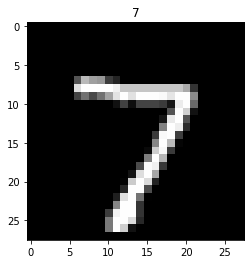

In [38]:
plt.title(test_y[0])
plt.imshow(test_image,'gray')
plt.show()

In [39]:
pred = model.predict(test_image.reshape(1,28,28,1))

In [40]:
pred.shape

(1, 10)

In [41]:
pred

array([[5.5704490e-11, 1.1218334e-09, 3.1202468e-08, 1.7634523e-08,
        1.4160159e-10, 1.8674296e-11, 6.9446605e-14, 9.9999964e-01,
        1.4502097e-10, 3.8972024e-07]], dtype=float32)

In [42]:
np.argmax(pred)

7

In [43]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

In [44]:
preds = model.predict(test_batch)
preds

array([[5.57047013e-11, 1.12183762e-09, 3.12025890e-08, 1.76345569e-08,
        1.41602133e-10, 1.86743676e-11, 6.94466050e-14, 9.99999642e-01,
        1.45021245e-10, 3.89720981e-07],
       [8.72839721e-08, 2.38854696e-08, 9.99999881e-01, 1.52476420e-09,
        3.50732707e-11, 1.53263808e-11, 1.42642973e-08, 1.31675260e-09,
        3.43831186e-09, 1.03732814e-10],
       [2.73231393e-07, 9.99995947e-01, 5.19232003e-07, 2.94884672e-09,
        4.08310029e-07, 2.38748669e-07, 1.14042234e-06, 1.04045205e-06,
        3.18975339e-07, 1.30725695e-07],
       [9.99969125e-01, 2.33664057e-08, 3.99620205e-07, 1.98587831e-08,
        9.02922892e-09, 1.18538674e-06, 2.29885190e-05, 5.68606993e-08,
        4.30764743e-07, 5.86384158e-06],
       [1.82223747e-09, 4.08939940e-08, 1.41374379e-08, 9.03569386e-10,
        9.98818815e-01, 1.57733112e-07, 9.93254101e-09, 3.94237993e-08,
        4.18706350e-08, 1.18104671e-03],
       [1.79207007e-07, 9.99998093e-01, 1.55765619e-07, 4.32212710e-10,
   

In [51]:
np.argmax(preds,-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

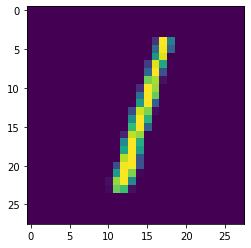

In [50]:
plt.imshow(test_batch[2,:,:,0])
plt.show()